<a href="https://colab.research.google.com/github/siddhanttripathi13/data_analysis/blob/main/Sales%20Data/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sale Analysis

## Import necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import calendar

## Merge 12 months of data into a single csv file

In [2]:
files = [file for file in os.listdir('./Sales Data')]

all_df = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales Data/'+file)
    all_df = pd.concat([all_df, df])
    
all_df.to_csv('all_months_data.csv', index=False)

## Read updated data into a dataframe

In [3]:
all_data = pd.read_csv('all_months_data.csv')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Data Cleaning

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)] # datafram containing all nan values
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data = all_data.dropna(how='all')

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or'] # data contains entries with column names as values, removing those data points

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",08
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",08
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035",08
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",08
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",08


### Correcting data type and adding month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float64')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8


### Adding order value column

In [12]:
all_data['Order Value'] = all_data['Price Each']*all_data['Quantity Ordered']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68


## Analysis

### Sales by Month

In [13]:
sales_by_month = all_data.groupby('Month')[['Order Value']].sum()
sales_by_month['Order Value']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Order Value, dtype: float64

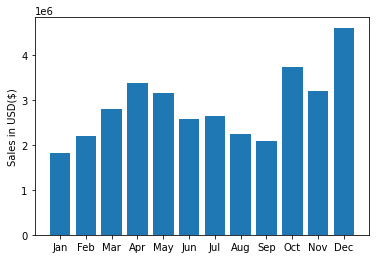

In [14]:
month = [calendar.month_abbr[i] for i in range(1,13)]

plt.bar(month, sales_by_month['Order Value'])
plt.ylabel('Sales in USD($)')
plt.show()

### Sales by city

#### Adding city column

In [16]:
all_data['City'] = all_data['Purchase Address'].apply(lambda address:f"{address.split(',')[1]} ({address.split(',')[2].split()[0]})") # city column has state info to avoid cities from different states with the same name
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA)
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX)
2,236672,iPhone,1,700.00,08/06/19 14:40,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR)
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA)
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY)


In [17]:
sales_by_city = all_data.groupby('City')[['Order Value']].sum()
sales_by_city

,Order Value
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


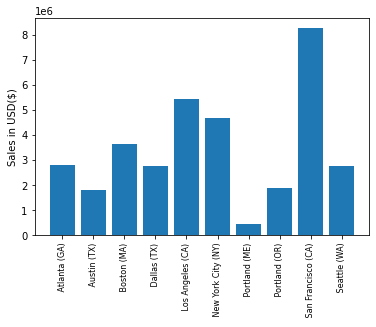

In [23]:
plt.bar(sales_by_city.index, sales_by_city['Order Value'])
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Sales in USD($)')
plt.show()

### Best time to advertise products

#### Adding hour and minutes column

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Order Value,City,Hour,Minute
0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",8,23.98,Seattle (WA),22,21
1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",8,99.99,Dallas (TX),15,11
2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",8,700.00,Portland (OR),14,40
3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",8,7.68,Los Angeles (CA),20,59
4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",8,7.68,New York City (NY),19,53


In [20]:
order_by_time = all_data.groupby('Hour')['Order ID'].count()
order_by_time

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

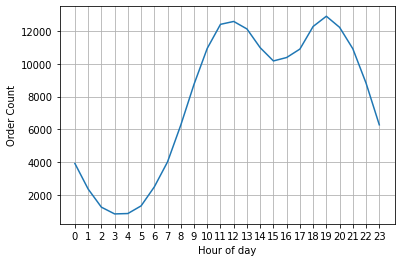

In [22]:
plt.plot(order_by_time.index, order_by_time)
plt.xticks(order_by_time.index)
plt.grid()
plt.ylabel('Order Count')
plt.xlabel('Hour of day')
plt.show()

Number of orders peak at 11am and 7pm in a day. Therefore, best time to advertise would be just before these i.e., 9-10am and 5-6pm.

### Products often sold together

In [24]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x)) #joining products with the same order id
df = df[['Order ID','Grouped']].drop_duplicates() # dropping duplicate order ids
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
46,236716,"AA Batteries (4-pack),USB-C Charging Cable"
60,236729,"iPhone,Apple Airpods Headphones"
62,236730,"Google Phone,Wired Headphones"
132,236799,"Google Phone,Wired Headphones"
163,236829,"Vareebadd Phone,USB-C Charging Cable"


In [25]:
from itertools import combinations
from collections import Counter

rows = df.Grouped
count = Counter()

for row in rows:
    row_list = row.split(',') #splitting products in each order
    count.update(Counter(combinations(row_list,2))) #counting combinations of 2 products
    
[print(key,value) for key,value in count.most_common(10)]



('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


[None, None, None, None, None, None, None, None, None, None]

### Most sold product and why?

In [27]:
sold_most = all_data.groupby('Product').sum()
sold_most[['Quantity Ordered']].sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered
Product,
AAA Batteries (4-pack),31017
AA Batteries (4-pack),27635
USB-C Charging Cable,23975
Lightning Charging Cable,23217
Wired Headphones,20557
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
27in FHD Monitor,7550
iPhone,6849


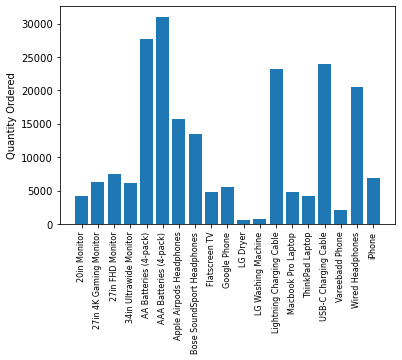

In [ ]:
plt.bar(sold_most.index,sold_most['Quantity Ordered'])
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.show()

#### Overlay price data to justify most sold product

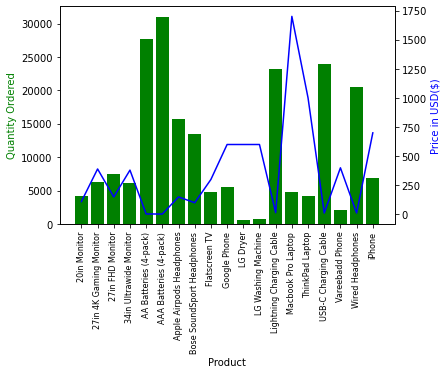

In [28]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(sold_most.index, sold_most['Quantity Ordered'], color = 'g')
ax2.plot(sold_most.index, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in USD($)', color='b')
ax1.set_xticklabels(sold_most.index,rotation='vertical',size=8)

plt.show()

In [38]:
quantity_price = pd.DataFrame(sold_most['Quantity Ordered']).join(prices,on='Product') #joining the quantity ordered with the avg price of each product
quantity_price.head()

,Quantity Ordered,Price Each
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84


In [39]:
quantity_price.corr() #correlation between quantity ordered and avg price of each product

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.601443
Price Each,-0.601443,1.000000
